# Question No. 1: (Showing data)

# NO.1_i. How many training and test examples are there?

* Answer to NO.1_i：

    There are 5841 training examples and 1563 test examples.

In [11]:
import h5py
import numpy as np
D = h5py.File('breast.h5', 'r')
X,Y,P = D['images'],np.array(D['counts']),np.array(D['id'])

c=0
d=0
for a in P:
    if a<=13:
        c=c+1
    else:
        d=d+1
print(f"training examples: {c} ; test examples: {d}")


training examples: 5841 ; test examples: 1563


# NO.1_ii. Show some image examples using plt.imshow. 
Describe your observations on what you see in the images and how it correlates with the cell count (target variable)

* Answer to NO.1_ii:
    
    As the images shown below, we can observe some cells within the images. Some of the cells (lymphocytes) were stained in brown, and others are stained in blue. Each image coresponds to a count number, which refers to the number of brown cells (lymphocytes) observed in the image.
    

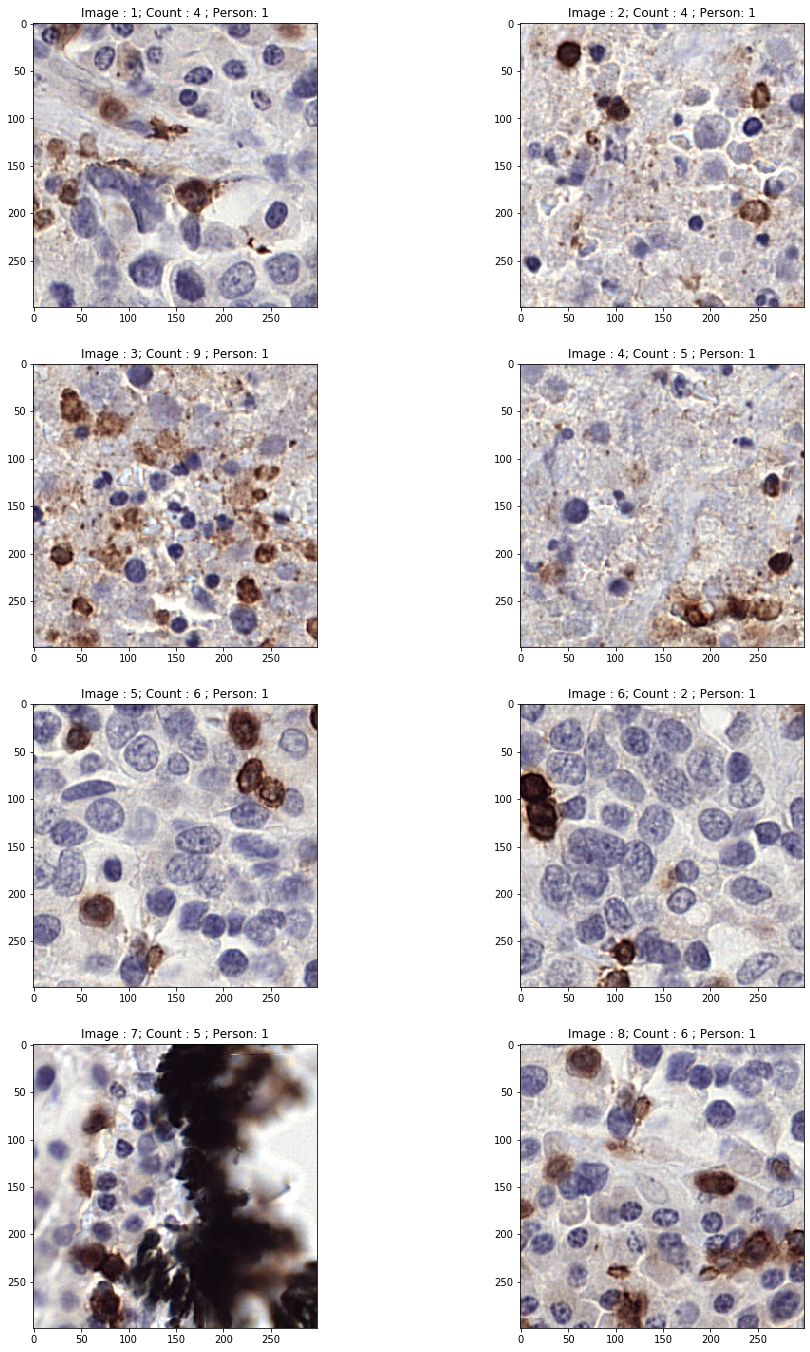

In [3]:
import matplotlib.pyplot as plt
img=X
plt.figure(num='ich',figsize=(16,24))#create a window/space for showing images
#show image examples 1-8
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.title(f"Image : {i}; Count : {Y[i-1]} ; Person: {P[i-1]}")
    plt.imshow(X[i-1])

# NO.1_iii. Plot the histogram of counts. 
How many images have counts within each of the following bins?
* 0 (no lymphocytes) * 1-5 * 6-10 * 11-20 * 21-50 * 51-200 * counts>200

*Answer to No.1_iii: 
As we can see from the results below, most of the images belong to the bin of cell counts from 1 to 5. Morevoer, there is a trend that, the more cell counts (lymphocytes) observed, the fewer images are existed. This trend may vary if different sample-selecting methods are applied. If all these 18  different individuals are all breast cancer patients, by and large 1-5 lymphocytes counts could be taken as an indicator of risk of breast cancer, or some certain features of breast cancer tissues.


|Bins|Images Counts|
|----|----|
0     |    1397
1-5    |   4811
6-10   |    736
11-20   |   356
21-50   |   103
51-200   |    1
|>200    |    0

Counts of each bins: 
 0         1397
1-5       4811
6-10       736
11-20      356
21-50      103
51-200       1
>200         0
dtype: int64


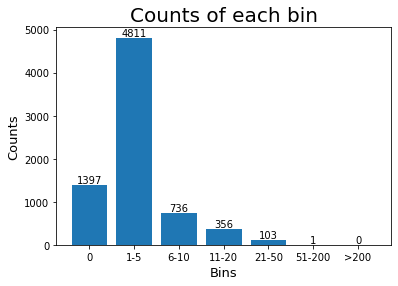

Another way to plot the histogram of counts


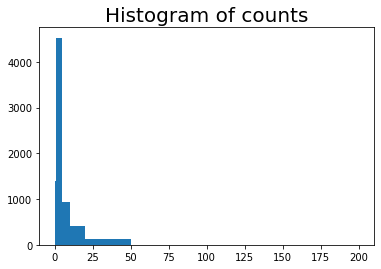

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
count = pd.Series(Y)
bins = (0,1,6,11,21,51,201, np.inf)  # define bin edges
labels = ('0','1-5','6-10','11-20','21-50','51-200','>200') #define feature names
groups = pd.cut(count, bins=bins, labels=labels, right = False) #use panda.cut to group the data
a=groups.value_counts().sort_index()  #calculate the counts of each bin and sort the display by index
print(f'Counts of each bins: \n {a}')


#plot the bar chart

xbins = ['0','1-5','6-10','11-20','21-50','51-200','>200']#define x-interval label
#we use positions to coordinate which person goes where on the x-axis and where the labels go
positions  = [0,1,2,3,4,5,6]
counts=a
#if sort_index() is not applied to a, then replace counts as follow
#counts=[a[0],a[1],a[2],a[3],a[4],a[5],a[6]]

plt.bar(positions, counts, width=0.8, align="center")

plt.xticks(positions, xbins)
#plt.yticks(list(range(0,6)))
for i in range(len(counts)):
    plt.text(i,counts[i], counts[i], ha = 'center',va = 'bottom')
plt.title('Counts of each bin',fontsize=20)
plt.xlabel('Bins',fontsize=13)
plt.ylabel('Counts',fontsize=13)
plt.show()


#another way to plot the histogram of counts
print('Another way to plot the histogram of counts')
plt.hist(Y,bins=[0,1,5,10,20,50,200])
plt.title('Histogram of counts',fontsize=20)
plt.show()




# NO.1_iv. Pre-processing: Convert and view a few images from RGB space to HED space and show the D channel which should identify the brown elements in the image. 
For this purpose, you can use the color separation notebook available here: 

* https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html

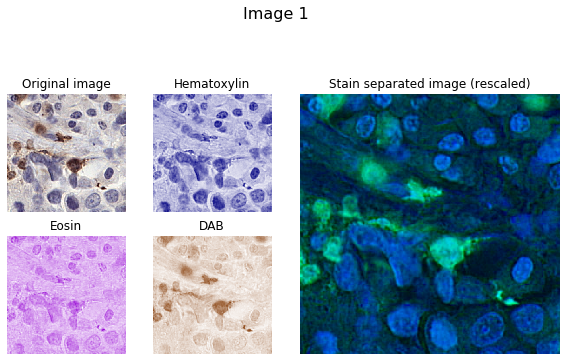

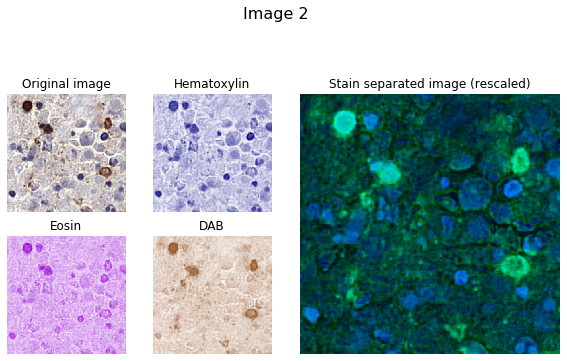

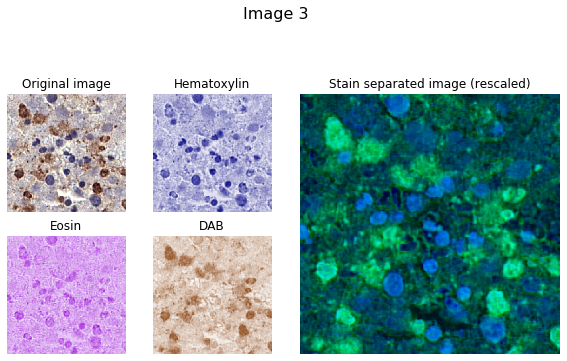

In [4]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

for i in range(1,4):
    ihc_rgb = X[i-1]
    ihc_hed = rgb2hed(ihc_rgb)
    
    fig = plt.figure()
    fig.set_size_inches(w=10,h=10)

    plt.suptitle(f'Image {i}',ha = 'center',va = 'bottom', fontsize=16)
    ax1 = plt.subplot2grid((4,4), (0,0))
    ax2 = plt.subplot2grid((4,4), (0,1))
    ax3 = plt.subplot2grid((4,4), (1,0))
    ax4 = plt.subplot2grid((4,4), (1,1))
    ax5 = plt.subplot2grid((4,4), (0,2),rowspan=2,colspan=2)

    ax1.imshow(ihc_rgb)
    ax1.set_title("Original image")
    ax1.axis('off')

    ax2.imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
    ax2.set_title("Hematoxylin")
    ax2.axis('off')

    ax3.imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
    ax3.set_title("Eosin")
    ax3.axis('off')

    ax4.imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
    ax4.set_title("DAB")
    ax4.axis('off')
    
    #Now we can easily manipulate the hematoxylin and DAB “channels”:
    import numpy as np
    from skimage.exposure import rescale_intensity

    #Rescale hematoxylin and DAB signals and give them a fluorescence look
    h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
    d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
    zdh = np.dstack((np.zeros_like(h), d, h))

    ax5.imshow(zdh)
    ax5.set_title("Stain separated image (rescaled)")
    ax5.axis('off')
    plt.show()


These 3 groups of pictures above show the first three images of the dataset. Within each group, the first image is the original image, the rest three small images demonstrate Hematoxylin, Eosin and DAB channels of converted HED space. And the last one is the fluorescence look of the image by rescaling and stacking the hematoxylin and DAB signals. The original image looks a bit complex and there are more than three colours, which is not easy for us to distinguish target cells(brown cells). By comparing all the image channels, we found Hematoxylin and DAB channels are more likely to make the target cells recognised. Therefore, we may focus more on H and D channels.

* NO.1_v. Do a scatter plot of the average of the brown channel for each image vs. its cell count. Do you think this feature would be useful in your regression model? Explain your reasoning. 

In [2]:
#By spliting the dataset into small batches, only 2 minutes required to run the following:
#tqdm package installation may be required for demonstrate the progress bar
#pip install tqdm
from skimage.color import rgb2hed
from tqdm import tqdm

avg=[]
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img_hed = rgb2hed(ihc_rgb)
    if y<=7000:
        for i in range(0,500):
            pic=img_hed[i]
            d=pic[:, :, 2]
            v = np.mean(d)
            avg.append(v)
    else:
        for i in range(0,404):
            pic=img_hed[i]
            d=pic[:, :, 2]
            v = np.mean(d)
            avg.append(v)
    pass

    

100%|██████████| 15/15 [01:41<00:00,  6.74s/it]


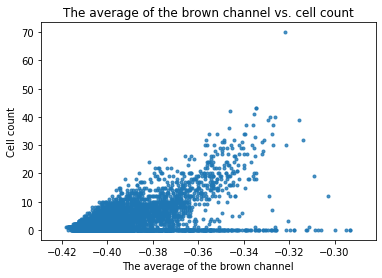

In [132]:
plt.title('The average of the brown channel vs. cell count')
plt.scatter(avg,Y,marker='.',alpha=0.8)
plt.xlabel('The average of the brown channel')
plt.ylabel('Cell count')
plt.show()

Answer to NO.1_v:

The scatter plot above demonstrates the feature of the relationship between the average of the brown channel and the cell count. We can observe from the pattern that the smaller the mean is, the fewer cell count is observed, and the scatter plot looks like there is somewhat a linear association between the cell count and the mean of brown channel. We assume that this feature is useful for the regression model. Because the regression model should be built on the relationship between the cell count obseved (dependent variable) and the feature of the observed target (independent variable). In this case, the mean of the brown channel can be measured and calculated, which can be used to represent the feature of the observed target. However, notice that there are some dots located on the right with cell count of 0, these data might affect the analysis, to solve the problem, these outliers could be considered for elimination in regression analysis whereas for machine learning model these data points can be used to distinguish whether there are target cells within the images.

In [40]:
#tqdm package installation may be required for demonstrate the progress bar
#pip install tqdm
from tqdm import tqdm

# Convert evey image to HED and extract the H and E channels:
avg1=[]
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img_hed = rgb2hed(ihc_rgb)
    if y<=7000:
        for i in range(0,500):
            pic=img_hed[i]
            d=pic[:, :, 0]
            v = np.mean(d)
            avg1.append(v)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 0]
            v = np.mean(d)
            avg1.append(v)
    pass

avg2=[]
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img_hed = rgb2hed(ihc_rgb)
    if y<=7000:
        for i in range(0,500):
            pic=img_hed[i]
            d=pic[:, :, 1]
            v = np.mean(d)
            avg2.append(v)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 1]
            v = np.mean(d)
            avg2.append(v)
    pass    

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:39<00:00,  6.62s/it]


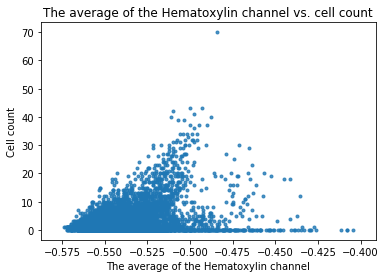

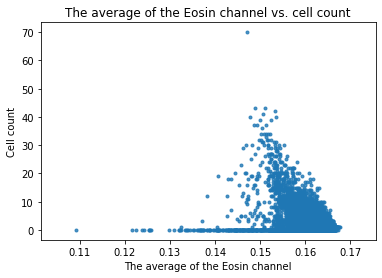

In [41]:
plt.title('The average of the Hematoxylin channel vs. cell count')
plt.scatter(avg1,Y,marker='.',alpha=0.8)
plt.xlabel('The average of the Hematoxylin channel')
plt.ylabel('Cell count')
plt.show()

plt.title('The average of the Eosin channel vs. cell count')
plt.scatter(avg2,Y,marker='.',alpha=0.8)
plt.xlabel('The average of the Eosin channel')
plt.ylabel('Cell count')
plt.show()

However, we know that brown channel is not the only choice. We may apply the same method and see how it goes with the H and E channels. The plot of "H" and "E" channels look not as discrete as the "brown" channel. It's probably not an optimal choice to extract features of these two channels since the data could be seen as highly clustered. And we don't consider these two channels for regression.

# NO.1_vi. What is the number of images for each patient? Do you think this can have an impact on your regression model?

* Answer to NO.1_vi:

The number of images for each patient are shown below. The impact on the regression model could vary in different situations. If each patient shares the same quantity of images, we can say this is a balanced sample. While it is more complicated in data collection since we cannot expect the cell counts of the images for each patient share the same distribution pattern. So the number of images for a specific patient can affect the sample mean and the sample variance. However, the regression model should be established based on the features of each image and the cell count of that image (The cell counts are associated with the specific images). The model will intend to predict the cell counts of the image based on the feature extraction of specific image itself, thus the predicted cell counts are less likely associated with patient identity or the number of images.

In [30]:
import pandas as pd
result = pd.value_counts(P).sort_index()
print(f'ID  Counts\n{result}')


ID  Counts
1     320
2     465
3     958
4     192
5      44
6     105
7      83
8     632
9     533
10    552
11    761
12    791
13    405
14    105
15    399
16    604
17    103
18    352
dtype: int64


# NO.1_vii. What performance metrics can you use for this purpose? Which one will be the best performance metric for this problem? Please give reasoning.

* Answer to NO.1_vii:

* Root mean squared error(RMSE), R-square(R2), and correlation coefficient can be used for this project. 

Correlation coefficient only shows whether a factor is correlated to the dependent variable, it could be used for feature selection process and we will know whether a single factor has a positive or negative correlation with the dependent variable. However, it seems hard to intepret how well a model is.

RMSE is the mean of the square root of the error between the predicted value and the true value. It could be affected by the values themselves and it is useful when we need to compare the validation data. The less RMSE is, the better we achieve the prediction.

R-squared is commonly used in regression models to assess the degree to which the predicted value conforms to the actual value. That means R2 is more suitable for measuring how well future outcomes can be predicted by the model. In general, the closer R2 is to 1, the better the independent variable explains the dependent variable in regression analysis. In this case, we are trying to find out a model that could fit the data, so R2 will be the best performance metric for this problem.

# No. 2: i. Extract features from a given image. 
Specifically, calculate the:
* a. average of the “brown”, red, green and blue channels
* b. variance of the “brown”, red, green and blue channels
* c. entropy of the “brown”, red, green and blue channels
* d. Histogram of each channel
* e. PCA Coefficients (you may want to use randomized PCA or incremental PCA, see:
    * https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* f. Any other features that you think can be useful for this work. Describe your reasoning for using these features.
* Plot the scatter plot and calculate the correlation coefficient of each feature you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning.

Solution to No.2_i: The 3rd image is selected for Question NO.2_i

In [81]:
# a. average of the “brown”, red, green and blue channels
# b. variance of the “brown”, red, green and blue channels
# c. entropy of the “brown”, red, green and blue channels
from skimage.measure import shannon_entropy
pic = X[2]
d = rgb2hed(pic)
brown = d[:, :, 2]
R=pic[:,:,0]
G=pic[:,:,1]
B=pic[:,:,2]

for x,y in [('brown',brown),('R',R),('G',G),('B',B)]:
    a=np.mean(y)
    a_x=[]
    a_x.append(a)
    v=np.var(y)
    v_x=[]
    v_x.append(v)
    e=shannon_entropy(y,base=2)
    e_x=[]
    e_x.append(e)
    print(f'Average  of {x}: {a_x}')
    print(f'Variance of {x}: {v_x}')
    print(f'Entropy  of {x}: {e_x} \n')
    


Average  of brown: [-0.3665955245233804]
Variance of brown: [0.0008929976864749477]
Entropy  of brown: [14.7175825448571] 

Average  of R: [177.90891600765093]
Variance of R: [1742.8974542012988]
Entropy  of R: [7.269907238919566] 

Average  of G: [163.73146832809476]
Variance of G: [2142.2470706161293]
Entropy  of G: [7.446308818462843] 

Average  of B: [164.0979295533607]
Variance of B: [1897.3680565850534]
Entropy  of B: [7.35887914926666] 



* Answer:

Average, variance, entropy of the “brown”, red, green and blue channels are shown in the table:


|         Results       |Brown             |   Red        |   Green        |    Blue
|------------------|------------------|--------------|----------------|-----------|
Average            | -0.3665955245233804   | 177.90891600765093   | 163.73146832809476 |164.0979295533607
Variance           | 0.0008929976864749477 | 1742.8974542012988    | 2142.2470706161293 |1897.3680565850534
Entropy            | 14.7175825448571    | 7.269907238919566    | 7.446308818462843 |7.35887914926666


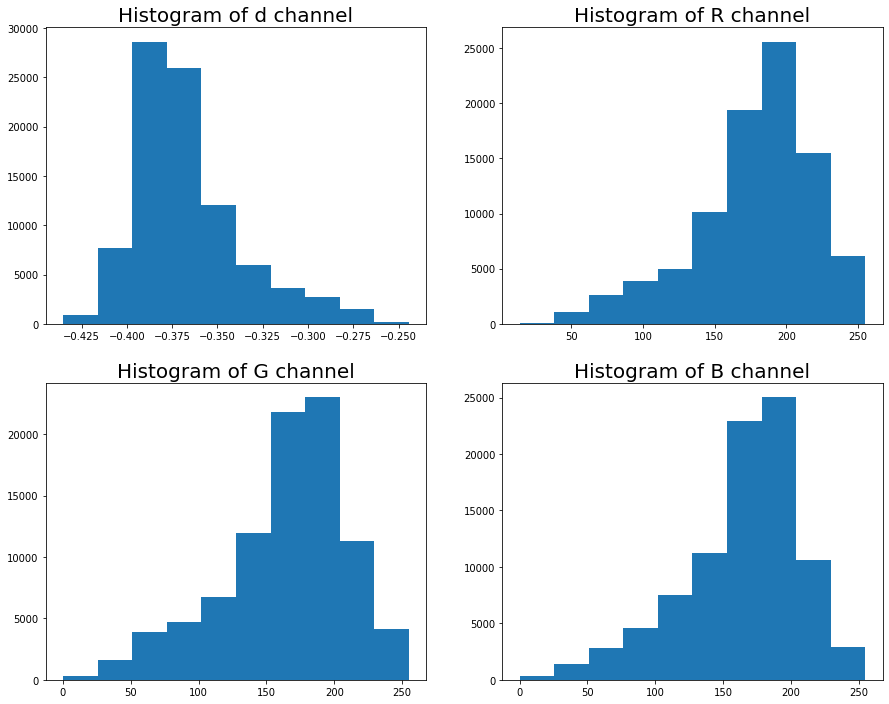

In [100]:
#d. Histogram of each channel
fig = plt.figure()
fig.set_size_inches(w=15,h=12)

ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))
    
ax1.hist(brown.flatten())
ax1.set_title('Histogram of d channel',fontsize=20)

ax2.hist(R.flatten())
ax2.set_title('Histogram of R channel',fontsize=20)

ax3.hist(G.flatten())
ax3.set_title('Histogram of G channel',fontsize=20)

ax4.hist(B.flatten())
ax4.set_title('Histogram of B channel',fontsize=20)

plt.show()

* By flattening the data, we make the values somewhat rounded to the nearest number and We can get some information from the histogram. In the "brown" channel, most values are around -0.4 to -0.36. However, in RGB channels, most values are distributed from 150 to 200. This might be some kind of features that we can use for further analysis. We assume that we can select these values that are clustered and to some extent it seems like easier to extract the patterns of them.

In [72]:
#e. PCA Coefficients
#Randomized PCA
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes three components
randomized_pca = PCA(n_components=3,svd_solver='randomized')
randomized_pca.fit(brown)
randomized_pca.fit(R)
randomized_pca.fit(G)
randomized_pca.fit(B)
brownpca = randomized_pca.transform(brown)
Rpca = randomized_pca.transform(R)
Gpca = randomized_pca.transform(G)
Bpca = randomized_pca.transform(B)
print(f'PCA Coefficients of brwon: \n {brownpca} \n')
print(f'PCA Coefficients of R: \n {Rpca} \n')
print(f'PCA Coefficients of G: \n {Gpca} \n')
print(f'PCA Coefficients of B: \n {Bpca} \n')

PCA Coefficients of brwon: 
 [[1953.23744395  452.45931425  417.63149054]
 [1953.23042053  452.45953018  417.63523877]
 [1953.22361175  452.46033712  417.62907237]
 [1953.20473384  452.45820249  417.61499301]
 [1953.19683528  452.45494661  417.61210452]
 [1953.19067262  452.44792843  417.6087796 ]
 [1953.18527658  452.44318046  417.61167051]
 [1953.18516455  452.44276319  417.61550995]
 [1953.18191249  452.44255562  417.61473498]
 [1953.18159388  452.44788779  417.60446949]
 [1953.18119627  452.45549571  417.59520288]
 [1953.18377168  452.46847407  417.59414069]
 [1953.18102503  452.46774396  417.58865889]
 [1953.18452713  452.47034364  417.58259589]
 [1953.18958712  452.48292954  417.57964818]
 [1953.18780661  452.49006821  417.57457277]
 [1953.18559525  452.49398     417.57291371]
 [1953.18500285  452.49331995  417.56712689]
 [1953.18488281  452.48603944  417.551745  ]
 [1953.18895991  452.46579539  417.56678669]
 [1953.18832636  452.46494911  417.55565148]
 [1953.1959914   452.46771


PCA Coefficients of R: 
 [[-1.52693509e+02  3.03324291e+01 -3.64934557e+02]
 [-1.27278556e+02  2.39750788e+01 -3.74178015e+02]
 [-1.09807087e+02  1.98182010e+01 -3.64605342e+02]
 [-7.09146172e+01  3.37116037e+01 -3.47188617e+02]
 [-4.68656213e+01  3.51125963e+01 -3.29627582e+02]
 [-1.72069216e+01  3.34828038e+01 -3.10751350e+02]
 [ 3.69396373e+00  3.14604929e+01 -2.98717277e+02]
 [ 1.46344952e+01  3.16423971e+01 -2.97394850e+02]
 [ 2.18614446e+01  3.84730556e+01 -2.89948841e+02]
 [ 2.45345273e+01  3.87661573e+01 -2.73158984e+02]
 [ 2.42325447e+01  3.26339932e+01 -2.58574151e+02]
 [ 1.08724338e+01  2.26339242e+01 -2.62009521e+02]
 [ 1.83751294e+01  2.14145658e+01 -2.49422565e+02]
 [ 1.73125908e+01  5.65344668e+00 -2.36776481e+02]
 [ 1.19425344e+01 -1.77656141e+01 -2.24376624e+02]
 [ 1.22162345e+01 -3.82710073e+01 -2.15358763e+02]
 [ 1.29435339e+01 -3.91956657e+01 -2.12034516e+02]
 [ 1.18854941e+01 -2.57639277e+01 -1.97531234e+02]
 [ 1.34400294e+01 -1.10126475e+01 -1.73589302e+02]
 [-1.


PCA Coefficients of G: 
 [[-1.48710953e+02  4.28000991e+01 -3.78336635e+02]
 [-1.22094616e+02  3.92395126e+01 -3.88494196e+02]
 [-1.03853733e+02  3.73598886e+01 -3.80342612e+02]
 [-6.80944585e+01  3.65841602e+01 -3.65456649e+02]
 [-4.24523796e+01  3.92538441e+01 -3.49122328e+02]
 [-9.62832120e+00  3.98863871e+01 -3.30098868e+02]
 [ 1.63764711e+01  3.73966286e+01 -3.18708755e+02]
 [ 2.90597027e+01  3.84776300e+01 -3.18163472e+02]
 [ 3.38527823e+01  4.09865768e+01 -3.08226167e+02]
 [ 3.52569224e+01  3.99763483e+01 -2.90454848e+02]
 [ 3.24850529e+01  3.18702659e+01 -2.75097487e+02]
 [ 2.56115914e+01  2.53026485e+01 -2.71788554e+02]
 [ 3.01735761e+01  2.30891595e+01 -2.57298416e+02]
 [ 2.59251074e+01  9.78898570e+00 -2.44891481e+02]
 [ 1.69785265e+01 -1.39995187e+01 -2.32883279e+02]
 [ 1.45319047e+01 -3.28976993e+01 -2.22887239e+02]
 [ 1.24014903e+01 -3.91152355e+01 -2.21424379e+02]
 [ 1.05455696e+01 -2.66920895e+01 -2.06004014e+02]
 [ 1.21181964e+01 -1.00696488e+01 -1.80826482e+02]
 [ 1.


PCA Coefficients of B: 
 [[-1.86905657e+02  4.37336770e+01 -2.99488381e+02]
 [-1.67972926e+02  4.07847041e+01 -3.07452874e+02]
 [-1.53084863e+02  3.80275352e+01 -2.96618259e+02]
 [-1.16095036e+02  4.52094013e+01 -2.73965502e+02]
 [-9.73224448e+01  4.93169918e+01 -2.63423133e+02]
 [-7.77947393e+01  5.59216846e+01 -2.51272188e+02]
 [-6.23537096e+01  5.96267629e+01 -2.48935586e+02]
 [-5.73508426e+01  6.00484038e+01 -2.52580611e+02]
 [-5.05585775e+01  6.28329871e+01 -2.48431670e+02]
 [-4.86555915e+01  5.71673042e+01 -2.30041468e+02]
 [-4.82181649e+01  4.60303024e+01 -2.13691613e+02]
 [-5.70127089e+01  2.83821704e+01 -2.13310502e+02]
 [-5.07769765e+01  2.92884584e+01 -2.02299565e+02]
 [-5.50079489e+01  2.04898809e+01 -1.90976920e+02]
 [-6.30693463e+01 -2.97504421e+00 -1.82685182e+02]
 [-6.13432419e+01 -1.92616133e+01 -1.73150061e+02]
 [-5.88049114e+01 -2.43395933e+01 -1.70167640e+02]
 [-5.85733786e+01 -1.79440749e+01 -1.57587435e+02]
 [-5.74588960e+01 -3.49515405e+00 -1.30425121e+02]
 [-7.

In [60]:
#e. PCA Coefficients
#incremental PCA
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=3, batch_size=3)
ipca.fit(brown)
ipca.fit(R)
ipca.fit(G)
ipca.fit(B)
brownipca = ipca.transform(brown)
Ripca = ipca.transform(R)
Gipca = ipca.transform(G)
Bipca = ipca.transform(B)
print(f'iPCA Coefficients of brwon: \n {brownipca} \n')
print(f'iPCA Coefficients of R: \n {Ripca} \n')
print(f'iPCA Coefficients of G: \n {Gipca} \n')
print(f'iPCA Coefficients of B: \n {Bipca} \n')

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\COLIN\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\COLIN\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\COLIN\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:161: RuntimeWarning

iPCA Coefficients of brwon: 
 [[ -751.29605896 -1015.75012532  -230.46450111]
 [ -751.30110841 -1015.76738887  -230.47639787]
 [ -751.31723227 -1015.77952447  -230.48777174]
 [ -751.3335267  -1015.78680016  -230.50109954]
 [ -751.33651873 -1015.79420381  -230.51909579]
 [ -751.32518191 -1015.84004372  -230.49735522]
 [ -751.32418191 -1015.82530988  -230.49746881]
 [ -751.3330414  -1015.82191837  -230.47127107]
 [ -751.35388482 -1015.82146128  -230.43285994]
 [ -751.3725498  -1015.80505334  -230.41999103]
 [ -751.3711878  -1015.78572372  -230.42238652]
 [ -751.34866654 -1015.7846647   -230.42030401]
 [ -751.32907484 -1015.79781247  -230.41639533]
 [ -751.36002549 -1015.79198344  -230.43402611]
 [ -751.34024636 -1015.78774286  -230.41809062]
 [ -751.34402288 -1015.78168884  -230.40368819]
 [ -751.3593175  -1015.78508355  -230.38770617]
 [ -751.36349982 -1015.7847938   -230.36900769]
 [ -751.36906505 -1015.76934717  -230.3524571 ]
 [ -751.3677904  -1015.76502916  -230.33783886]
 [ -751.35


iPCA Coefficients of R: 
 [[ 2.86641863e+02  1.57742061e+02  1.72294869e+02]
 [ 3.06552802e+02  1.51056488e+02  1.87873385e+02]
 [ 3.45159922e+02  1.66227889e+02  2.00459430e+02]
 [ 3.78002469e+02  2.12036795e+02  2.19848534e+02]
 [ 3.91601161e+02  2.61295805e+02  2.52962908e+02]
 [ 4.07200886e+02  2.42318735e+02  2.71160905e+02]
 [ 4.06286797e+02  2.05698940e+02  2.76903018e+02]
 [ 4.15427251e+02  1.82137330e+02  2.30397907e+02]
 [ 4.37481141e+02  1.68949805e+02  1.73383397e+02]
 [ 4.52565579e+02  1.34957847e+02  1.63847194e+02]
 [ 4.46086299e+02  9.50150662e+01  1.72074110e+02]
 [ 4.26329457e+02  9.25163130e+01  1.63265709e+02]
 [ 4.07602069e+02  1.10669119e+02  1.46146476e+02]
 [ 3.80020431e+02  1.19266042e+02  1.23809098e+02]
 [ 3.53796011e+02  1.14436323e+02  1.04364281e+02]
 [ 3.59688439e+02  1.09081239e+02  8.60986731e+01]
 [ 3.67587255e+02  1.31505326e+02  6.76851791e+01]
 [ 3.59744437e+02  1.53664175e+02  5.21650849e+01]
 [ 3.67228584e+02  1.50799163e+02  3.95182200e+01]
 [ 3


iPCA Coefficients of G: 
 [[ 2.43662515e+02  6.60174530e+01  1.77178164e+02]
 [ 2.63029322e+02  7.74624096e+01  2.00907532e+02]
 [ 3.06614237e+02  1.06302207e+02  2.17019532e+02]
 [ 3.45779554e+02  1.48496774e+02  2.34705781e+02]
 [ 3.65417204e+02  1.86135131e+02  2.65071276e+02]
 [ 3.55044444e+02  1.81184303e+02  2.99909420e+02]
 [ 3.62518126e+02  1.48654767e+02  2.90342638e+02]
 [ 3.80616991e+02  1.31972454e+02  2.27804162e+02]
 [ 4.09636458e+02  1.24811610e+02  1.56391946e+02]
 [ 4.27868033e+02  9.07703665e+01  1.42302469e+02]
 [ 4.20623079e+02  4.81295232e+01  1.54441255e+02]
 [ 3.97401005e+02  3.32670189e+01  1.50648957e+02]
 [ 3.78134691e+02  4.64521757e+01  1.40447067e+02]
 [ 3.62589015e+02  7.10541191e+01  1.13511386e+02]
 [ 3.40992103e+02  6.38513750e+01  1.01932722e+02]
 [ 3.49281585e+02  5.65758763e+01  8.93098347e+01]
 [ 3.54598375e+02  7.05343503e+01  6.43301539e+01]
 [ 3.36449390e+02  8.21599019e+01  3.09572498e+01]
 [ 3.41772728e+02  7.29690101e+01  4.60018586e+00]
 [ 3


iPCA Coefficients of B: 
 [[ 2.52084087e+02  6.72259511e+01  1.97653492e+02]
 [ 2.66878325e+02  8.37830130e+01  2.17635235e+02]
 [ 3.00405579e+02  1.02964151e+02  2.34942185e+02]
 [ 3.31838221e+02  1.28193932e+02  2.57429680e+02]
 [ 3.41525294e+02  1.54887374e+02  2.90863576e+02]
 [ 3.35882233e+02  1.93017204e+02  2.78595490e+02]
 [ 3.34483737e+02  1.61659548e+02  2.79348946e+02]
 [ 3.47846722e+02  1.49626739e+02  2.31229718e+02]
 [ 3.79373916e+02  1.44924724e+02  1.66503922e+02]
 [ 4.04907396e+02  1.13964114e+02  1.48605325e+02]
 [ 3.99878758e+02  7.73991285e+01  1.54606222e+02]
 [ 3.67786094e+02  7.33290304e+01  1.49360073e+02]
 [ 3.39712721e+02  9.32108318e+01  1.38628703e+02]
 [ 3.61070707e+02  9.28371996e+01  1.45911503e+02]
 [ 3.29493425e+02  8.60541667e+01  1.22616674e+02]
 [ 3.35424455e+02  7.79539528e+01  1.01060012e+02]
 [ 3.54224628e+02  9.05779523e+01  7.69754106e+01]
 [ 3.54138739e+02  9.86461937e+01  5.07947709e+01]
 [ 3.62156585e+02  8.08276129e+01  2.84878322e+01]
 [ 3

* f. Any other features that you think can be useful for this work. Describe your reasoning for using these features.
* Answer to f: 
*   It may be useful to apply Image Binarization and then calculate the mean, variance, entropy and pca coefficients. The process is to take a grayscale image and convert it to black-and-white, essentially reducing the information contained within the image from 256 shades of gray to 2: black and white. This method could make the cells easier to be recognised or classified. However, further process like "median filter" may be needed for reducing the noise of the images. And then the space containing useless data could be eliminated.
*   Shape and texture are important features in image classification whereas the shape of target cells are not so different from other kinds of cells and the texture are not clear enough since the size of images are very small. 

* Plot the scatter plot and calculate the correlation coefficient of each feature vs. the target variable (cell count) across all images.

In [12]:
#Plot the scatter plot and calculate the correlation coefficient of each feature vs.the target variable (cell count) across all images.

# average, variance, entropy of the “brown”, red, green and blue channels

# average, variance, entropy of the “brown”channel
import numpy as np
from tqdm import tqdm
from skimage.color import rgb2hed
from skimage.measure import shannon_entropy
from sklearn.decomposition import PCA
from sklearn import preprocessing
avg_hed=[]
var_hed=[]
ent_hed=[]
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img = rgb2hed(ihc_rgb)
    if y<=7000:
        for i in range(0,500):
            pic=img[i]
            d=pic[:, :, 2]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_hed.append(a)
            var_hed.append(v)
            ent_hed.append(e)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 2]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_hed.append(a)
            var_hed.append(v)
            ent_hed.append(e)
    pass


# average, variance, entropy of the red channel
avg_r=[]
var_r=[]
ent_r=[]
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img = ihc_rgb
    if y<=7000:
        for i in range(0,500):
            pic=img[i]
            d=pic[:, :, 0]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_r.append(a)
            var_r.append(v)
            ent_r.append(e)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 0]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_r.append(a)
            var_r.append(v)
            ent_r.append(e)
    pass

# average, variance, entropy of the green channel
avg_g=[]
var_g=[]
ent_g=[]
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img = ihc_rgb
    if y<=7000:
        for i in range(0,500):
            pic=img[i]
            d=pic[:, :, 1]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_g.append(a)
            var_g.append(v)
            ent_g.append(e)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 1]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_g.append(a)
            var_g.append(v)
            ent_g.append(e)
    pass

# average, variance, entropy of the blue channel
avg_b=[]
var_b=[]
ent_b=[]
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
    ihc_rgb=X[x:y]
    img = ihc_rgb
    if y<=7000:
        for i in range(0,500):
            pic=img[i]
            d=pic[:, :, 2]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_b.append(a)
            var_b.append(v)
            ent_b.append(e)
    else:
        for i in range(0,404):
            pic=img[i]
            d=pic[:, :, 2]
            a = np.mean(d)
            v = np.var(d)
            e = shannon_entropy(d,base=2)
            avg_b.append(a)
            var_b.append(v)
            ent_b.append(e)
    pass

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:00<00:00,  4.03s/it]


In [13]:
import numpy as np
from tqdm import tqdm
from skimage.color import rgb2hed
from sklearn.decomposition import PCA
from sklearn import preprocessing

#PCA for "brown" channel
pca_hed=[]
randompca = PCA(n_components=3,svd_solver='randomized')
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000)]):
    ihc_rgb=X[x:y]
    img = rgb2hed(ihc_rgb)
    img_flatten=np.reshape(img,(y-x,299*299,3))
    img_scaled=preprocessing.scale(img_flatten[:,:,2])
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    pca_hed.append(rp)
    a=np.asarray(pca_hed).reshape(-1,3)
    pass


for x,y in tqdm([(7000,7404)]):
    ihc_rgb=X[x:y]
    img = rgb2hed(ihc_rgb)
    img_flatten=np.reshape(img,(y-x,299*299,3))
    img_scaled=preprocessing.scale(img_flatten[:,:,2])
    randompca.fit(img_scaled)

    rp = randompca.transform(img_scaled)
    b=rp.reshape(-1,3)
    pass

pca_hed=np.vstack((a,b))
pca_hed.shape

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.67s/it]


(7404, 3)

The dataset is too large for a laptop with only 8G memory, so we split the dataset into some groups and apply iteration on the dataset. This method applied above highly improves the speed of calculation and it will not cause memory errors.

In [14]:
#We scaled the dataset to apply normalisation.
#apply flatten to all the images and apply preprocessing of scale on R, G, B channels
from sklearn import preprocessing
import numpy as np
X_flatten=np.reshape(X,(7404,299*299,3))
# X_flatten=np.reshape(X,(7404,-1))
X_scaled_R=preprocessing.scale(X_flatten[:,:,0])
X_scaled_G=preprocessing.scale(X_flatten[:,:,1])
X_scaled_B=preprocessing.scale(X_flatten[:,:,2])

We scaled the dataset to apply normalisation.

In [15]:
#PCA for R, G, B channels
import numpy as np
from tqdm import tqdm
from skimage.color import rgb2hed
from sklearn.decomposition import PCA
from sklearn import preprocessing

#PCA for R channel
pca_r=[]
randompca = PCA(n_components=3,svd_solver='randomized')
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000)]):
    img_scaled=X_scaled_R[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    pca_r.append(rp)
    a=np.asarray(pca_r).reshape(-1,3)
    pass

for x,y in tqdm([(7000,7404)]):
    img_scaled=X_scaled_R[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    b=rp.reshape(-1,3)
    pass

pca_r=np.vstack((a,b))
pca_r.shape

#PCA for G channel
pca_g=[]
randompca = PCA(n_components=3,svd_solver='randomized')
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000)]):
    img_scaled=X_scaled_G[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    pca_g.append(rp)
    a=np.asarray(pca_g).reshape(-1,3)
    pass

for x,y in tqdm([(7000,7404)]):
    img_scaled=X_scaled_G[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    b=rp.reshape(-1,3)
    pass

pca_g=np.vstack((a,b))
pca_g.shape

#PCA for B channel
pca_b=[]
randompca = PCA(n_components=3,svd_solver='randomized')
# for x,y in ([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
#                  (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500)]):
for x,y in tqdm([(0,500),(500,1000),(1000,1500),(1500,2000),(2000,2500),(2500,3000),(3000,3500),(3500,4000),
                 (4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000)]):
    img_scaled=X_scaled_B[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    pca_b.append(rp)
    a=np.asarray(pca_b).reshape(-1,3)
    pass

for x,y in tqdm([(7000,7404)]):
    img_scaled=X_scaled_B[x:y]
    randompca.fit(img_scaled)
    rp = randompca.transform(img_scaled)
    b=rp.reshape(-1,3)
    pass

pca_b=np.vstack((a,b))
pca_b.shape

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.42s/it]


(7404, 3)

In [8]:
# pca_r[0]
# pca_g[0]
# pca_b[0]


# avg_hed
# var_hed
# ent_hed
# pca_hed

# avg_r
# var_r
# ent_r
# pca_r

# avg_g
# var_g
# ent_g
# pca_g

# avg_b
# var_b
# ent_b
# pca_b

array([ 16.28617208,  53.18542274, -16.86741005])

In [16]:
#transform the lists into array for correlation calculation
xd1=np.asarray(avg_hed)
xd2=np.asarray(var_hed)
xd3=np.asarray(ent_hed)
xd4=np.asarray(pca_hed)

xr1=np.asarray(avg_r)
xr2=np.asarray(var_r)
xr3=np.asarray(ent_r)
xr4=np.asarray(pca_r)

xg1=np.asarray(avg_g)
xg2=np.asarray(var_g)
xg3=np.asarray(ent_g)
xg4=np.asarray(pca_g)

xb1=np.asarray(avg_b)
xb2=np.asarray(var_b)
xb3=np.asarray(ent_b)
xb4=np.asarray(pca_b)

for i in [xd1,xd2,xd3,xd4,xr1,xr2,xr3,xr4,xg1,xg2,xg3,xg4,xb1,xb2,xb3,xb4]:
    print(i.shape)

(7404,)
(7404,)
(7404,)
(7404, 3)
(7404,)
(7404,)
(7404,)
(7404, 3)
(7404,)
(7404,)
(7404,)
(7404, 3)
(7404,)
(7404,)
(7404,)
(7404, 3)


The former process calculate and append the outcomes as lists. To make sure that we get arrays for further analysis, wo apply the operation above and reshape them into consistent format.

In [17]:
# calculate the correlation coefficient of each feature vs. the target variable (cell count) across all images
from scipy.stats import pearsonr
for x,y in [(avg_hed,Y),(var_hed,Y),(ent_hed,Y),(pca_hed[:,0],Y),(avg_r,Y),(var_r,Y),(ent_r,Y),(pca_r[:,0],Y),
             (avg_g,Y),(var_g,Y),(ent_g,Y),(pca_g[:,0],Y),(avg_b,Y),(var_b,Y),(ent_b,Y),(pca_b[:,0],Y)]:
    co=pearsonr(x,y)
    print(co)

(0.5925905331304644, 0.0)
(0.4372111712756694, 0.0)
(0.4538037331745229, 0.0)
(0.5646073277306235, 0.0)
(-0.41697597789967517, 2.212977038272883e-309)
(0.15261987421658346, 7.928221596721465e-40)
(0.4126696424615466, 1.9302493943606624e-302)
(0.39243228907403177, 3.672700396354418e-271)
(-0.4785895917683095, 0.0)
(0.24255853612490294, 1.315583189299786e-99)
(0.44195243485408303, 0.0)
(0.46088528338112117, 0.0)
(-0.5387397493715256, 0.0)
(0.3098443918501181, 1.7726006633239426e-164)
(0.5099741323230803, 0.0)
(0.5175281688221122, 0.0)


Correlation coefficients between featues and cell counts:

|Channels| mean | variance| entropy| PCA(1st column)
|----|----|----|----|----|
Brown |0.5925905331304644|0.4372111712756694|0.4538037331745229|(0.5646073277306235
Red |-0.41697597789967517|0.15261987421658346|0.4126696424615466|0.39243228907403177
Green|-0.4785895917683095|0.24255853612490294|0.44195243485408303|0.46088528338112117
Blue |-0.5387397493715256|0.3098443918501181|0.5099741323230803|0.5175281688221122

The correlation coefficients can provide some information about the association between features and cell counts.We can see that most of the features somehow correlate to the cell count.


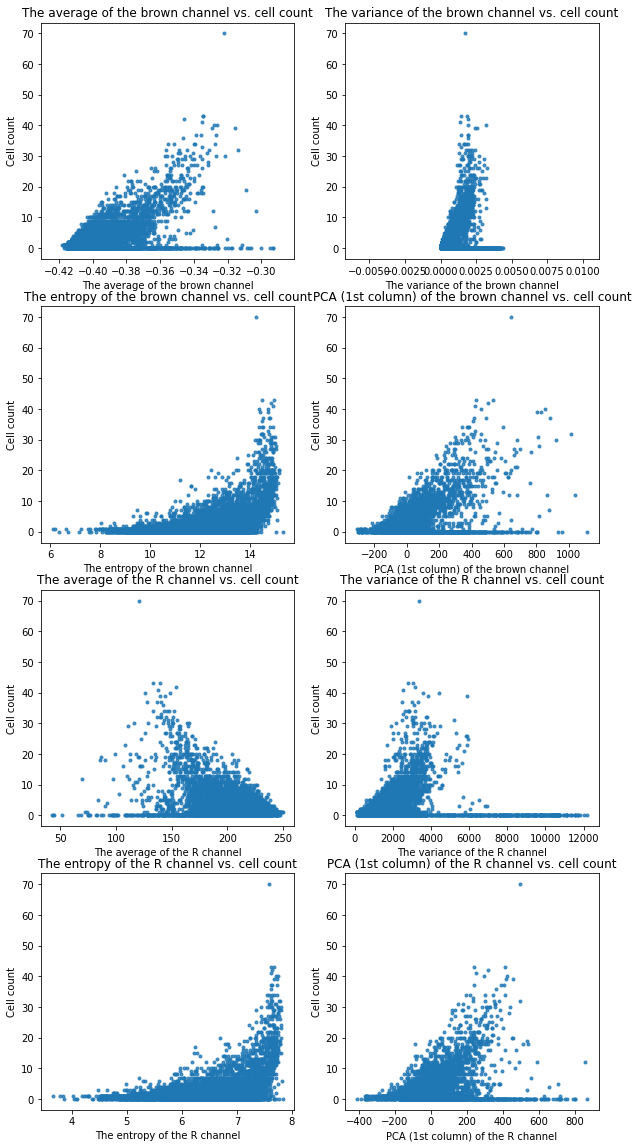

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(w=10,h=20)

ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)


ax1.set_title('The average of the brown channel vs. cell count')
ax1.scatter(avg_hed,Y,marker='.',alpha=0.8)
ax1.set_xlabel('The average of the brown channel')
ax1.set_ylabel('Cell count')

ax2.set_title('The variance of the brown channel vs. cell count')
ax2.scatter(var_hed,Y,marker='.',alpha=0.8)
ax2.set_xlabel('The variance of the brown channel')
ax2.set_ylabel('Cell count')

ax3.set_title('The entropy of the brown channel vs. cell count')
ax3.scatter(ent_hed,Y,marker='.',alpha=0.8)
ax3.set_xlabel('The entropy of the brown channel')
ax3.set_ylabel('Cell count')

ax4.set_title('PCA (1st column) of the brown channel vs. cell count')
ax4.scatter(pca_hed[:,0],Y,marker='.',alpha=0.8)
ax4.set_xlabel('PCA (1st column) of the brown channel')
ax4.set_ylabel('Cell count')

ax5.set_title('The average of the R channel vs. cell count')
ax5.scatter(avg_r,Y,marker='.',alpha=0.8)
ax5.set_xlabel('The average of the R channel')
ax5.set_ylabel('Cell count')

ax6.set_title('The variance of the R channel vs. cell count')
ax6.scatter(var_r,Y,marker='.',alpha=0.8)
ax6.set_xlabel('The variance of the R channel')
ax6.set_ylabel('Cell count')

ax7.set_title('The entropy of the R channel vs. cell count')
ax7.scatter(ent_r,Y,marker='.',alpha=0.8)
ax7.set_xlabel('The entropy of the R channel')
ax7.set_ylabel('Cell count')

ax8.set_title('PCA (1st column) of the R channel vs. cell count')
ax8.scatter(pca_r[:,0],Y,marker='.',alpha=0.8)
ax8.set_xlabel('PCA (1st column) of the R channel')
ax8.set_ylabel('Cell count')

plt.show()



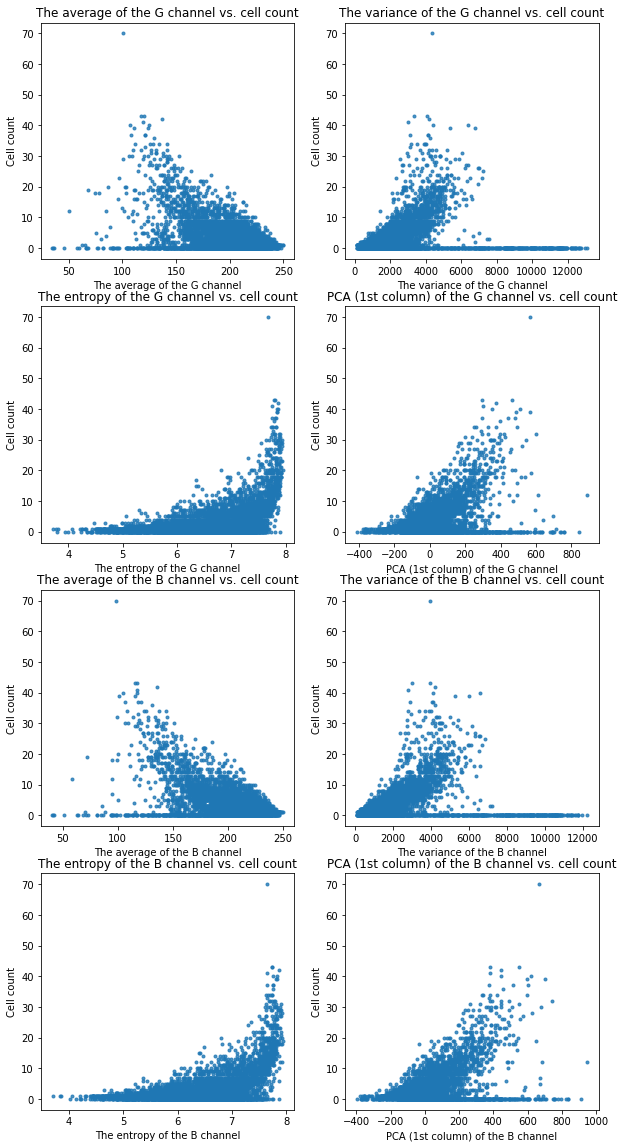

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(w=10,h=20)

ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)

ax1.set_title('The average of the G channel vs. cell count')
ax1.scatter(avg_g,Y,marker='.',alpha=0.8)
ax1.set_xlabel('The average of the G channel')
ax1.set_ylabel('Cell count')

ax2.set_title('The variance of the G channel vs. cell count')
ax2.scatter(var_g,Y,marker='.',alpha=0.8)
ax2.set_xlabel('The variance of the G channel')
ax2.set_ylabel('Cell count')

ax3.set_title('The entropy of the G channel vs. cell count')
ax3.scatter(ent_g,Y,marker='.',alpha=0.8)
ax3.set_xlabel('The entropy of the G channel')
ax3.set_ylabel('Cell count')

ax4.set_title('PCA (1st column) of the G channel vs. cell count')
ax4.scatter(pca_g[:,0],Y,marker='.',alpha=0.8)
ax4.set_xlabel('PCA (1st column) of the G channel')
ax4.set_ylabel('Cell count')

ax5.set_title('The average of the B channel vs. cell count')
ax5.scatter(avg_b,Y,marker='.',alpha=0.8)
ax5.set_xlabel('The average of the B channel')
ax5.set_ylabel('Cell count')

ax6.set_title('The variance of the B channel vs. cell count')
ax6.scatter(var_b,Y,marker='.',alpha=0.8)
ax6.set_xlabel('The variance of the B channel')
ax6.set_ylabel('Cell count')

ax7.set_title('The entropy of the B channel vs. cell count')
ax7.scatter(ent_b,Y,marker='.',alpha=0.8)
ax7.set_xlabel('The entropy of the B channel')
ax7.set_ylabel('Cell count')

ax8.set_title('PCA (1st column) of the B channel vs. cell count')
ax8.scatter(pca_b[:,0],Y,marker='.',alpha=0.8)
ax8.set_xlabel('PCA (1st column) of the B channel')
ax8.set_ylabel('Cell count')

plt.show()

*Most of the scatter plots above look like sharing some kind of similar pattern. Some data are clustered and some are discrete.

In [19]:
#reshape the features into 2d
xd1=np.squeeze(np.asarray(avg_hed)).reshape(7404,-1)
xd2=np.squeeze(np.asarray(var_hed)).reshape(7404,-1)
xd3=np.squeeze(np.asarray(ent_hed)).reshape(7404,-1)
xd4=np.squeeze(np.asarray(pca_hed)).reshape(7404,-1)

xr1=np.squeeze(np.asarray(avg_r)).reshape(7404,-1)
xr2=np.squeeze(np.asarray(var_r)).reshape(7404,-1)
xr3=np.squeeze(np.asarray(ent_r)).reshape(7404,-1)
xr4=np.squeeze(np.asarray(pca_r)).reshape(7404,-1)

xg1=np.squeeze(np.asarray(avg_g)).reshape(7404,-1)
xg2=np.squeeze(np.asarray(var_g)).reshape(7404,-1)
xg3=np.squeeze(np.asarray(ent_g)).reshape(7404,-1)
xg4=np.squeeze(np.asarray(pca_g)).reshape(7404,-1)

xb1=np.squeeze(np.asarray(avg_b)).reshape(7404,-1)
xb2=np.squeeze(np.asarray(var_b)).reshape(7404,-1)
xb3=np.squeeze(np.asarray(ent_b)).reshape(7404,-1)
xb4=np.squeeze(np.asarray(pca_b)).reshape(7404,-1)

for i in [xd1,xd2,xd3,xd4,xr1,xr2,xr3,xr4,xg1,xg2,xg3,xg4,xb1,xb2,xb3,xb4]:
    print(i.shape)

(7404, 1)
(7404, 1)
(7404, 1)
(7404, 3)
(7404, 1)
(7404, 1)
(7404, 1)
(7404, 3)
(7404, 1)
(7404, 1)
(7404, 1)
(7404, 3)
(7404, 1)
(7404, 1)
(7404, 1)
(7404, 3)


In [20]:
#combination of features
#we combine every features together as one variable and we will use it for the input of model training
X1=np.hstack((xd1,xd2,xd3,xd4,xr1,xr2,xr3,xr4,xg1,xg2,xg3,xg4,xb1,xb2,xb3,xb4))

print(X1.shape)

(7404, 24)


In [33]:
#create indexes for training data and select the training set
#because we are going to Use data from patient IDs 1-13 for training and cross validation and 14-18 for testing.

t=(P<=13)
v=(P>13)
x_train = X1[t]
y_train = Y[t]
x_test = X1[v]
y_test = Y[v]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5841, 24)
(5841,)
(1563, 24)
(1563,)


In [230]:
# #create indexes for training data and select the training set
# #because we are going to Use data from patient IDs 1-13 for training and cross validation and 14-18 for testing.

# t=(P<=13)
# v=(P>13)
# x_train = X1[:,t].reshape(-1,X1.shape[0])
# y_train = Y[t]
# x_test = X1[:,v].reshape(-1,X1.shape[0])
# y_test = Y[v]
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(5841, 24)
(5841,)
(1563, 24)
(1563,)


In [23]:
#Ordinary Least Squares (OLS) regression
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

skf = StratifiedKFold(n_splits=3,shuffle = True)
param_grid={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

ksvm_clf=linear_model.LinearRegression()

grid_search = GridSearchCV(ksvm_clf, param_grid, cv = skf)

grid_search.fit(x_train, y_train)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.6683811482631811
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Fold  0 RMSE: 2.950527773298402
Fold  0 CORR: (0.808903011763229, 0.0)
Fold  0 R2: 0.6486194634591453
Fold  1 RMSE: 2.4737947985871696
Fold  1 CORR: (0.8370626789041726, 0.0)
Fold  1 R2: 0.6997206076886946
Fold  2 RMSE: 2.4504096724532918
Fold  2 CORR: (0.8107082640731696, 0.0)
Fold  2 R2: 0.6501971813428129


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Text(0.5, 1.0, 'Regression Scatter Plot')

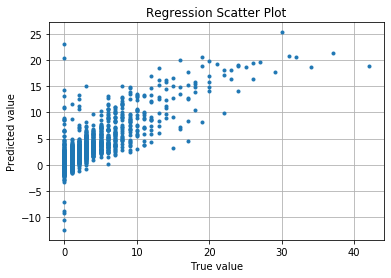

In [268]:
#Ordinary Least Squares (OLS) regression
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from math import sqrt

RMSE=[]
CORR=[]
R2=[]

skf = StratifiedKFold(n_splits=3,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train, y_train)):
    Xtr, Xv = x_train[tr_idx], x_train[v_idx]
    ytr, yv = y_train[tr_idx], y_train[v_idx]
    clf = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
    clf.fit(Xtr,ytr)
    yp = clf.predict(Xv)
    rmse = sqrt(mean_squared_error(yv, yp))
    RMSE.append(rmse)
    corr = pearsonr(yv,yp)
    CORR.append(corr)
    r2 = r2_score(yv,yp)
    R2.append(r2)
    print('Fold ',i,'RMSE:',rmse)
    print('Fold ',i,'CORR:',corr)
    print('Fold ',i,'R2:',r2)

#scatter plot between true and predicted counts
plt.figure();plt.plot(yv,yp,'.');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | 2.950527773298402    | 0.808903011763229    | 0.6486194634591453
1   | 2.4737947985871696   | 0.8370626789041726   | 0.6997206076886946
2   | 2.4504096724532918   | 0.8107082640731696   | 0.6501971813428129

The outcome of ordinary Least Squares (OLS) regression is shown above. It looks like cross validataion has improved the performance. But the way we process the images may be not an optimal choice, or because some features does not significantly correlate to the cell count calculation.

In [42]:
#create indexes for training data and select the training set
#because we are going to Use data from patient IDs 1-13 for training and cross validation and 14-18 for testing.

t=(P<=13)
v=(P>13)
x_train = X1[t]
y_train = Y[t]
x_test = X1[v]
y_test = Y[v]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5841, 24)
(5841,)
(1563, 24)
(1563,)


In [43]:
# printing the shape before reshaping and normalizing the data
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5841, 24)
y_train shape (5841,)
x_test shape (1563, 24)
y_test shape (1563,)


In [44]:
#Multilayer Perceptron
#pip install keras-tqdm

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
from keras import optimizers
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import numpy as np
from matplotlib import pyplot as plt # used for visualisation 
import pandas as pd #used to turn model history into a dataframe which we can manipulate and plot with
import time #used to compute code run time
from sklearn.model_selection import StratifiedKFold
from keras_tqdm import TQDMNotebookCallback
from keras import backend as K
from scipy.stats import pearsonr


#Define the R-square function for keras
def r_square(y_true, y_pred):
    SSR = K.mean(K.square(y_pred-K.mean(y_true)))
    SST = K.mean(K.square(y_true-K.mean(y_true)))
    return SSR/SST
#Define  rmse function for keras
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
#Define correlation_coefficient for keras
from keras import backend as K
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)

# Reshape the data from into a 2d tensor
# x_train = x_train.reshape(len(x_train),24)
# x_test = x_test.reshape(len(x_test),24)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# normalize the data to help with the training
x_train /= 255
x_test /= 255

# print the final input shape ready for training
# print("Final Train matrix shape", X_train.shape)
# print("Final Test matrix shape", X_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Multilayer perceptron model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Dense(32, input_dim=24, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss=rmse, optimizer='adam', metrics=[r_square,pearson_r])
    # Fit the model
    start = time.time()
    model_history = model.fit(x_train, y_train, 
                              epochs=10, 
                              batch_size=20, 
                              verbose=0,
                              callbacks=[TQDMNotebookCallback()],
                              validation_data=(x_test, y_test))
    finish = time.time()
    # evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(model.metrics_names[1], scores[1])
    print(model.metrics_names[2], scores[2])
    cvscores.append(scores[1])
    
print('cross validation scores:\n','R2 mean:',np.mean(cvscores),'\n R2 standard deviation:',np.std(cvscores))
print('Test RMSE:', scores[0])
print('Test R2:', scores[1])
print('Test correlation coefficient:', scores[2])
 

5841 train samples
1563 test samples


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



r_square 0.8774939775466919
pearson_r 0.866795539855957



r_square 0.6865195631980896
pearson_r 0.8439005017280579



r_square 0.7501873970031738
pearson_r 0.8773353099822998
cross validation scores:
 R2 mean: 0.7714003125826517 
 R2 standard deviation: 0.07939478393649653
Test RMSE: 2.1929979763653367
Test R2: 0.7501873970031738
Test correlation coefficient: 0.8773353099822998


In [45]:
#We then determine the output over training examples and compare with the true values.
mp=model.predict(x_test)

Text(0.5, 1.0, 'MLP Scatter Plot')

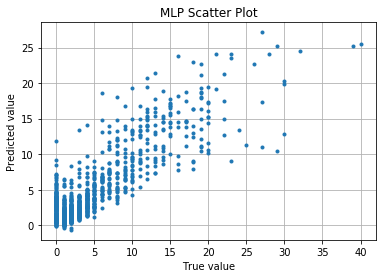

In [46]:
#scatter plot between true and predicted counts
plt.figure();plt.plot(y_test,mp,'.');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('MLP Scatter Plot')

|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | none    | 0.866795539855957    | 0.8774939775466919
1   | none    | 0.8439005017280579   | 0.6865195631980896
2   | none    | 0.8773353099822998   |  0.7501873970031738



|Model metrics|Value|
|----|----|
|R2 mean| 0.7714003125826517 
R2 standard deviation| 0.07939478393649653
Test RMSE| 2.1929979763653367
Test R2| 0.7501873970031738
Test correlation coefficient| 0.8773353099822998

The multilayer perceptron model looks good, RMSE is small and r2 is much closer to 1, which means that this model predicts pretty well with fewer errors and the model fits the data well. 

In [47]:
#Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = [{'alpha':['0.001','0.01','0.1','1','10','100']}]
 
clf = Ridge()
grid_search = GridSearchCV(clf,param_grid, cv = skf)
 
grid_search.fit(x_train, y_train)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.5865620419143293
{'alpha': '0.001'}
Ridge(alpha='0.001', copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fold  0 RMSE: 2.931630678346461
Fold  0 CORR: (0.7762700999297808, 0.0)
Fold  0 R2: 0.6023360553424694
Fold  1 RMSE: 3.033412570862495
Fold  1 CORR: (0.7747338790816047, 0.0)
Fold  1 R2: 0.5957480111912222
Fold  2 RMSE: 3.037557801326548
Fold  2 CORR: (0.7214455323693967, 5.4594298146536e-311)
Fold  2 R2: 0.48710593074962927


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Text(0.5, 1.0, 'Regression Scatter Plot')

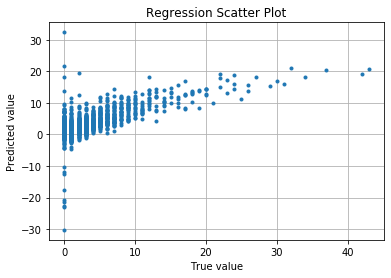

In [48]:
#Ridge Regression
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from math import sqrt

RMSE=[]
CORR=[]
R2=[]

skf = StratifiedKFold(n_splits=3,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train, y_train)):
    Xtr, Xv = x_train[tr_idx], x_train[v_idx]
    ytr, yv = y_train[tr_idx], y_train[v_idx]
    clf = Ridge(alpha='0.001', copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
    clf.fit(Xtr,ytr)
    yp = clf.predict(Xv)
    rmse = sqrt(mean_squared_error(yv, yp))
    RMSE.append(rmse)
    corr = pearsonr(yv,yp)
    CORR.append(corr)
    r2 = r2_score(yv,yp)
    R2.append(r2)
    print('Fold ',i,'RMSE:',rmse)
    print('Fold ',i,'CORR:',corr)
    print('Fold ',i,'R2:',r2)

#scatter plot between true and predicted counts
plt.figure();plt.plot(yv,yp,'.');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | 2.931630678346461    | 0.7762700999297808    | 0.6023360553424694
1   | 3.033412570862495    | 0.7747338790816047    | 0.5957480111912222
2   | 3.037557801326548    | 0.7214455323693967    |  0.48710593074962927


The Ridge Regression model looks not bad in R2, but RMSE is large. The scatter plot looks not that bad, but as we mentioned above, the 0 cell count may affect the result. The situation can be improved by eliminating the outliers if we still want to go further with it.

In [52]:
#Support Vector Regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={'C':[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],'kernel':['poly','rbf','linear']}

ksvm_clf=SVC()

grid_search = GridSearchCV(ksvm_clf, param_grid, cv = skf)

grid_search.fit(x_train, y_train)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.46122239342578325
{'C': 0.1, 'kernel': 'poly'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold  0 RMSE: 2.865828400452056
Fold  0 CORR: (0.8178292601855088, 0.0)
Fold  0 R2: 0.6512500155619775


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold  1 RMSE: 3.1280951750016035
Fold  1 CORR: (0.7553365471949206, 0.0)
Fold  1 R2: 0.49429961773903974


C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold  2 RMSE: 2.8900248138113955
Fold  2 CORR: (0.7846334761892054, 0.0)
Fold  2 R2: 0.570936377874011


Text(0.5, 1.0, 'Regression Scatter Plot')

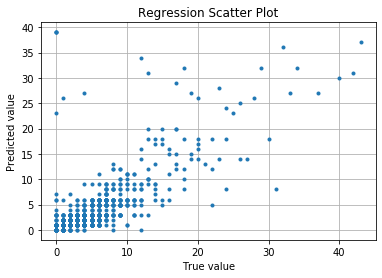

In [53]:
#Support Vector Regression
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from math import sqrt

RMSE=[]
CORR=[]
R2=[]

skf = StratifiedKFold(n_splits=3,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x_train, y_train)):
    Xtr, Xv = x_train[tr_idx], x_train[v_idx]
    ytr, yv = y_train[tr_idx], y_train[v_idx]
    clf = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    clf.fit(Xtr,ytr)
    yp = clf.predict(Xv)
    rmse = sqrt(mean_squared_error(yv, yp))
    RMSE.append(rmse)
    corr = pearsonr(yv,yp)
    CORR.append(corr)
    r2 = r2_score(yv,yp)
    R2.append(r2)
    print('Fold ',i,'RMSE:',rmse)
    print('Fold ',i,'CORR:',corr)
    print('Fold ',i,'R2:',r2)

#scatter plot between true and predicted counts
plt.figure();plt.plot(yv,yp,'.');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | 2.865828400452056     | 0.8178292601855088   | 0.6512500155619775
1   | 3.1280951750016035    | 0.7553365471949206   | 0.49429961773903974
2   | 2.8900248138113955    | 0.7846334761892054   | 0.570936377874011


The SVM Regression model results are above. The performance is not stable. The scatter plot looks like the model predicts somewaht close to the true values but there are still the prediction bias is a bit wide.

# Question No. 3(Using Convolutional Neural Networks)

In [54]:
#create indexes for training data and select the training set
#because we are going to Use data from patient IDs 1-13 for training and cross validation and 14-18 for testing.

t=(P<=13)
v=(P>13)

In [55]:
X_train = X[t,:]
Y_train = Y[t]
X_test = X[v,:]
Y_test = Y[v]

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5841, 299, 299, 3)
(5841,)
(1563, 299, 299, 3)
(1563,)


In [57]:
#pip install keras-tqdm
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
from keras import optimizers
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import numpy as np
import time #used to compute code run time
from sklearn.model_selection import StratifiedKFold
from keras_tqdm import TQDMNotebookCallback
from keras import backend as K
from scipy.stats import pearsonr


#Define the R-square function for keras
def r_square(y_true, y_pred):
    SSR = K.mean(K.square(y_pred-K.mean(y_true)))
    SST = K.mean(K.square(y_true-K.mean(y_true)))
    return SSR/SST
#Define  rmse function for keras
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
#Define correlation_coefficient for keras
from keras import backend as K
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)




In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
cnnxt=x_train.reshape(5841,4,2,3)
cnnxtt=x_test.reshape(1563,4,2,3)

(5841, 24)
(5841,)
(1563, 24)


In [72]:
#CNN model using features
#reshape the features fro CNN

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(4,2,3)))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(8, input_dim=24, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss=rmse, optimizer='adam', metrics=[r_square,pearson_r])
    # Fit the model
    start = time.time()
    model_history = model.fit(cnnxt, y_train, 
                              epochs=8, 
                              batch_size=20, 
                              verbose=0,
                              callbacks=[TQDMNotebookCallback()],
                             validation_data=(cnnxtt, y_test))
    finish = time.time()
    # evaluate the model
    scores = model.evaluate(cnnxtt, y_test, verbose=0)
    print(model.metrics_names[1], scores[1])
    print(model.metrics_names[2], scores[2])
    cvscores.append(scores[1])
    
print('cross validation scores:\n','R2 mean:',np.mean(cvscores),'\n R2 standard deviation:',np.std(cvscores))
print('Test RMSE:', scores[0])
print('Test R2:', scores[1])
print('Test correlation coefficient:', scores[2])
 

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



r_square 0.8795446157455444
pearson_r 0.8579272031784058



r_square 0.8277567625045776
pearson_r 0.8602485060691833



r_square 0.688014566898346
pearson_r 0.8389317989349365
cross validation scores:
 R2 mean: 0.7984386483828226 
 R2 standard deviation: 0.08089336093316413
Test RMSE: 2.473774295393199
Test R2: 0.688014566898346
Test correlation coefficient: 0.8389317989349365


|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | none    | 0.8579272031784058    | 0.8795446157455444
1   | none    | 0.8602485060691833   | 0.8277567625045776
2   | none    | 0.8389317989349365   | 0.688014566898346



|Model metrics|Value|
|----|----|
R2 mean| 0.7984386483828226 
R2 standard deviation| 0.08089336093316413
Test RMSE| 2.473774295393199
Test R2| 0.688014566898346
Test correlation coefficient| 0.8389317989349365

Feeding the features to CNN performs not that well. And we notice that it is easier to get R2 larger than 1, which means that the model is overfitting the data. Since the convenet layers are trying to extract the feature of the inputs, after extracting the features and feed them to the model may also cause the overfitting. We are going to apply CNN on images and see how it works for images input directly.

In [10]:
#CNN model using images
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(299,299,3)))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(32, input_dim=24, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss=rmse, optimizer='adam', metrics=[r_square,pearson_r])
    # Fit the model
    start = time.time()
    model_history = model.fit(X_train, Y_train, 
                              epochs=10, 
                              batch_size=20, 
                              verbose=0,
                              callbacks=[TQDMNotebookCallback()],
                             validation_data=(X_test, Y_test))
    finish = time.time()
    # evaluate the model
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print(model.metrics_names[1], scores[1])
    print(model.metrics_names[2], scores[2])
    cvscores.append(scores[1])
    
print('cross validation scores:\n','R2 mean:',np.mean(cvscores),'\n R2 standard deviation:',np.std(cvscores))
print('Test RMSE:', scores[0])
print('Test R2:', scores[1])
print('Test correlation coefficient:', scores[2])
 

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



r_square 1.0428147315979004
pearson_r 0.7542814016342163



r_square 0.7297034859657288
pearson_r 0.7942876815795898



r_square 0.9064006209373474
pearson_r 0.7432178854942322
cross validation scores:
 R2 mean: 0.8929729461669922 
 R2 standard deviation: 0.12817927516473782
Test RMSE: 3.8993299073007575
Test R2: 0.9064006209373474
Test correlation coefficient: 0.7432178854942322


|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | none    | 0.7542814016342163    | 1.0428147315979004
1   | none    | 0.7942876815795898   | 0.7297034859657288
2   | none    | 0.7432178854942322   | 0.9064006209373474



|Model metrics|Value|
|----|----|
R2 mean| 0.8929729461669922 
R2 standard deviation| 0.12817927516473782
Test RMSE| 3.8993299073007575
Test R2| 0.9064006209373474
Test correlation coefficient| 0.7432178854942322

Feeding the images to CNN performs pretty well. Although we notice that in the first fold of cross validation the model was overfitting, the following outcomes become much better since the model is learning and trying to adjust the prediction. And we notice that CNN model is very good at image processing, compared to the regression models we have attempted.

In [50]:
#CNN model using images
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(299, 299, 3)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss=rmse, optimizer='adam', metrics=[r_square,pearson_r])
    # Fit the model
    start = time.time()
    model_history = model.fit(X_train, Y_train, 
                              epochs=3, 
                              batch_size=100, 
                              verbose=0,
                              callbacks=[TQDMNotebookCallback()],
                             validation_data=(X_test, Y_test))
    finish = time.time()
    # evaluate the model
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print(model.metrics_names[1], scores[1])
    print(model.metrics_names[2], scores[2])
    cvscores.append(scores[1])
    
print('cross validation scores:\n','R2 mean:',np.mean(cvscores),'\n R2 standard deviation:',np.std(cvscores))
print('Test RMSE:', scores[0])
print('Test R2:', scores[1])
print('Test correlation coefficient:', scores[2])
 

C:\Users\COLIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)



r_square 1.4745680093765259
pearson_r 0.7667384147644043



r_square 0.6550058126449585
pearson_r nan



r_square 1.418495535850525
pearson_r 0.8284751176834106
cross validation scores:
 R2 mean: 1.1826897859573364 
 R2 standard deviation: 0.37383045385119423
Test RMSE: 3.690593018717897
Test R2: 1.418495535850525
Test correlation coefficient: 0.8284751176834106


This model is somehow overfitting all the time. Just leave it here and we can go on the research in tuning the hyper parameters and parameters  to get better results.

Optional-Challenge scores are as follow:

|Fold            |   RMSE       |   Correlation coefficient       |    R square
|----|----|----|----|
0   | none    | 0.7542814016342163    | 1.0428147315979004
1   | none    | 0.7942876815795898   | 0.7297034859657288
2   | none    | 0.7432178854942322   | 0.9064006209373474



|Model metrics|Value|
|----|----|
R2 mean| 0.8929729461669922 
R2 standard deviation| 0.12817927516473782
Test RMSE| 3.8993299073007575
Test R2| 0.9064006209373474
Test correlation coefficient| 0.7432178854942322
